## 오차제곱합

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
import numpy as np

def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답과 예측이 일치할 때
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [5]:
# 정답과 예측이 불일치할 때
sum_squares_error(np.array(y),np.array(t))

0.5975

## 교차 엔트로피 오차

In [6]:
def cross_entropy_error(y,t):
    delta = 1e-7 #0.0000001
    return -np.sum(t*np.log(y+delta)) # delta라는 아주 작은 수를 더해서 log 0(-inf)을 방지 

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [8]:
# 정답과 예측이 일치할 때
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [10]:
# 정답과 예측이 불일치할 때
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 미니배치 학습
- 데이터 양이 많을 때, 일부를 추려 전체의 '근사치'로 활용하기 위함

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
# 훈련 데이터에서 무작위로 10장만 빼내기

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #train_size 미만 수 중에서 무작위로 batch_size만큼 추출
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


In [13]:
#출력 예시
np.random.choice(60000, 10) 

array([19736, 15804, 32604, 21810, 15626, 25352, 56651, 39561,  8387,
       48271])

## (배치용) 교차 엔트로피 오차 구현

In [14]:
#데이터가 1개인 경우

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # 2차원으로 데이터 형상 변경
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size #batch_size로 나눠 정규화

In [15]:
#데이터가 배치로 묶여 입력될 경우

def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # 1차원으로 데이터 형상 변경
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size #batch_size로 나눠 정규화

## 수치 미분 
- 아주 작은 차분으로 미분하는 것

In [16]:
# 나쁜 구현의 예 -> 반올림 오차를 발생시킴(작은값이 생략되어 최종 계산 결과에 오차가 생기게 함)

def numerical_diff(f, x):
    h = 10e-50 #1e−49 = 0에 가까움
    return (f(x+h) - f(x)) / h
    

In [17]:
np.float32(1e-50) # 실제값이 아닌 생략된 값이 나옴

0.0

In [18]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h)) / (2*h) # 오차를 줄이기 위해 중앙 차분(중심 차분)으로 구함 (차분 : 임의 두 점에서의 함수 값들의 차이)


In [19]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

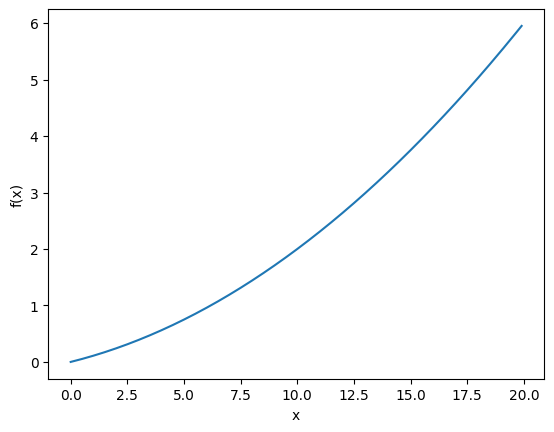

In [20]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) #0~20까지 0.1 간격의 배열 x를 만든다(20은 미포함)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [21]:
numerical_diff(function_1, 5)

0.1999999999990898

In [22]:
numerical_diff(function_1, 10)

0.2999999999986347

## 편미분
- 변수가 여럿인 함수에 대한 미분
- 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2


In [24]:
# 문제 1 : x0 = 3, x1 = 4 일때, x0에 대한 편미분을 구하라

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [25]:
numerical_diff(function_tmp1, 3.0) # x0으로 편미분하기 => x1은 x0에 의해 변화하지 않으므로 편미분 했을 때는 기울기에 변화가 없어 0으로 처리함 -> 2*x0이 되어서 정답은 6

6.00000000000378

In [26]:
# 문제 1 : x0 = 3, x1 = 4 일때, x1에 대한 편미분을 구하라

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1


In [27]:
numerical_diff(function_tmp2, 4.0) # x1으로 편미분하기 => x0은 x1에 의해 변화하지 않으므로 편미분 했을 때는 기울기에 변화가 없어 0으로 처리함 -> 2*x1이 되어서 정답은 8

7.999999999999119

## 기울기(gradient)
- 모든 변수의 편미분을 벡터(배열)로 정리한 것

In [28]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모두 0인 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx] # 현재값 저장(나중에 복원 위함)

        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad



In [29]:
numerical_gradient(function_2, np.array([3.0, 4.0])) # 두 변수 모두 미분했으므로 2*x0 , 2*x1 = 2*3 , 2*4 

array([6., 8.])

In [30]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [31]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


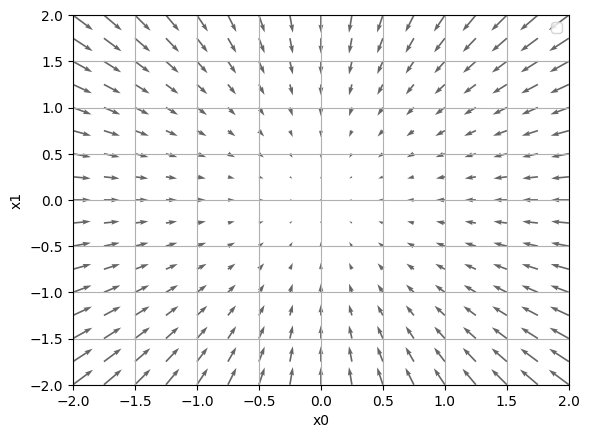

In [32]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

## 경사법(경사 하강법)
- 기울기를 활용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것

In [33]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): # f : 최적화하려는 함수, init_x : 초기값, lr : 학습률, step_num : 경사법에 따른 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x


In [34]:
# 문제 : 경사법으로 f(x0, x1) = x0**2 + x1**2의 최소값을 구하라

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

# 결과해석
## 거의 0에 가까운 결과

array([-6.11110793e-10,  8.14814391e-10])

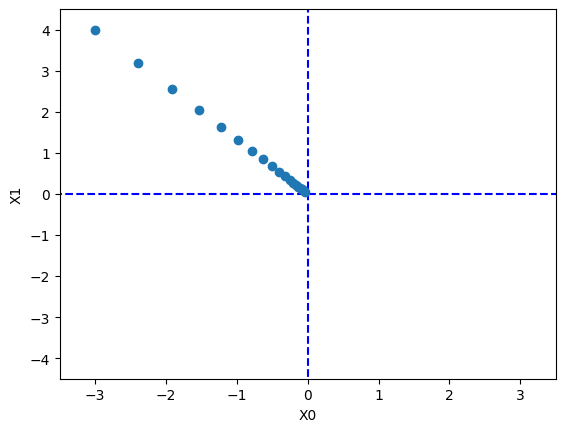

In [36]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [40]:
#학습률이 너무 큰 예 -> 너무 큰 값으로 발산해버림
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [39]:
#학습률이 너무 작은 예 -> 거의 갱신되지 않고 끝남
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

## 신경망에서의 기울기

In [50]:
import sys, os
sys.path.append(os.pardir) #pardir = parent directory = 부모(상위) 디렉토리 추가
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpletNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # (2,3)모양의 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t) : 
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t) # y(예측), t(실제) 간 오차

        return loss

In [51]:
net = simpletNet()
print(net.W) #가중치 매게변수

[[-0.37608324 -1.05455326 -0.06911551]
 [ 0.69389161  0.51591884 -0.46222064]]


In [52]:
x = np.array([0.6, 0.9])
p = net.predict(x) # x와 w를 dot(행렬곱)
print(p)

[ 0.3988525  -0.168405   -0.45746788]


In [53]:
np.argmax(p) # 최대값의 인덱스

0

In [54]:
t = np.array([0,0,1])
net.loss(x, t)

1.5453594115635778

In [55]:
# net의 손실함수 계산
def f(W):
    return net.loss(x,t)

In [56]:
#기울기 계산
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.30123498  0.17082389 -0.47205887]
 [ 0.45185247  0.25623583 -0.7080883 ]]


In [57]:
#def 형식 대신 lambda 형식도 가능
f = lambda w : net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 학습 알고리즘 구현

- 전제 : 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정 = 학습
- 1단계 : 미니배치(훈련 데이터 중 일부를 무작위로 가져온 데이터가 미니배치이며, 미니배치의 손실 함수값을 줄이는 것이 목표)
- 2단계 : 기울기 산출(각 가중치 매개변수의 기울기(손실함수의 값을 가장 작게하는 방향을 제시)를 구함)
- 3단계 : 매개변수 갱신(가중치 매개변수를 기울기 방향을 아주 조금 갱신)
- 4단계 : 반복(1~3단계 반복)

In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)  

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t: 정답 레이블

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) #예측값 y에서 확률이 가장 높은 클래스의 인덱스를 가져옴
        t = np.argmax(t, axis=1) #실제 레이블 t에서도 동일하게, 가장 높은 값(즉, 실제 클래스 레이블)을 가져옴(보통 원핫 인코딩으로 되어 있는 t에서 가장 높은 값을 가진 인덱스가 실제 클래스)

        accuracy = np.sum(y == t) / float(x.shape[0]) #예측값 y와 실제 레이블 t가 일치하는지 비교하여 True인 경우의 수 / 전체 데이터 개수 => 정확도(%)를 계산
        return accuracy
    
    # 각 매개변수의 기울기 계산
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])        

        return grads



## 미니배치 학습 구현

train acc, test acc | 0.0989, 0.0963
train acc, test acc | 0.78565, 0.7887
train acc, test acc | 0.8799833333333333, 0.8847
train acc, test acc | 0.89985, 0.9028
train acc, test acc | 0.9081, 0.9111
train acc, test acc | 0.9147833333333333, 0.9156
train acc, test acc | 0.9198666666666667, 0.9217
train acc, test acc | 0.92435, 0.9261
train acc, test acc | 0.9283833333333333, 0.9303
train acc, test acc | 0.9323666666666667, 0.9329
train acc, test acc | 0.9349833333333334, 0.936
train acc, test acc | 0.9385, 0.9374
train acc, test acc | 0.9410833333333334, 0.9398
train acc, test acc | 0.94285, 0.9413
train acc, test acc | 0.9448666666666666, 0.9431
train acc, test acc | 0.9462333333333334, 0.9431
train acc, test acc | 0.9484333333333334, 0.946


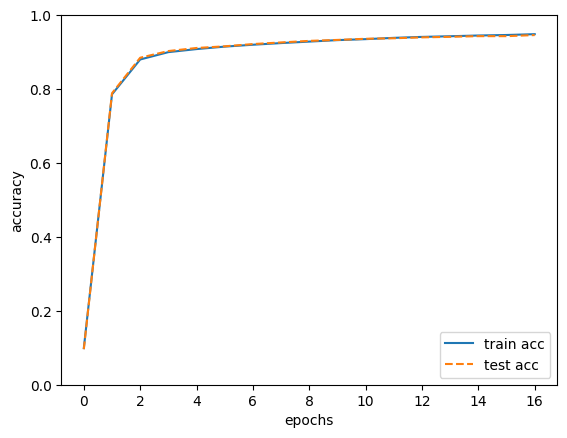

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) #훈련 데이터 크기(train_size)에서 미니배치 크기(batch_size)만큼 무작위로 인덱스를 선택
    x_batch = x_train[batch_mask] #미니배치로 선택된 입력 데이터
    t_batch = t_train[batch_mask] #해당 입력 데이터에 대한 정답 레이블
    
    #기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) #시간 오래 걸림
    grad = network.gradient(x_batch, t_batch) #오차 역전파법=> 시간 빠름
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0: #epoch = 전체 데이터를 한 번 학습하는 주기(1,000개의 샘플로 구성되어 있고, 미니배치 크기가 100이라면, 하나의 에폭을 완료하기 위해서는 10번의 반복(iteration)이 필요 = 10회가 1epoch)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()



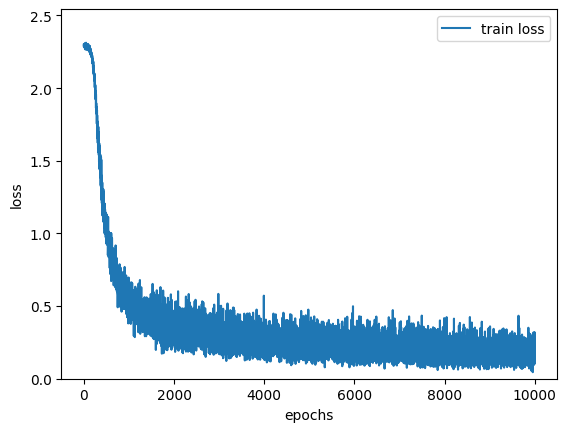

In [5]:
# 손실(loss) 그래프 그리기
x = np.arange(len(train_loss_list))  # 에폭에 해당하는 x축 값
plt.plot(x, train_loss_list, label='train loss')  # 훈련 손실 그래프
plt.xlabel("epochs")  # x축 라벨
plt.ylabel("loss")  # y축 라벨
plt.ylim(0, max(train_loss_list) * 1.1)  # y축 범위 (최대 손실보다 약간 크게 설정)
plt.legend(loc='upper right')  # 범례 위치
plt.show()  # 그래프 출력
